In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 

In [6]:
df = pd.read_csv('DataSets/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

<h1>Data Checks to perform</h1>
1. NUll Value Check <br>
2. Duplicates Check <br>
3. Check dtypes <br>
4. Check the number of unique values present in wach column <br>

In [9]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
## Check Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
## unique values of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [14]:
## stats of dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [21]:
numerical_features = [i for i in df.columns if df[i].dtype != 'O']
categorical_features = [i for i in df.columns if df[i].dtype == 'O']

In [19]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [22]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [26]:
df['total_score'] = (df['math_score'] + df['writing_score'] + df['reading_score'])
df['average_score'] = (df['total_score'] / 3)

In [25]:
type(df[['total_score']])

pandas.core.frame.DataFrame

In [27]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


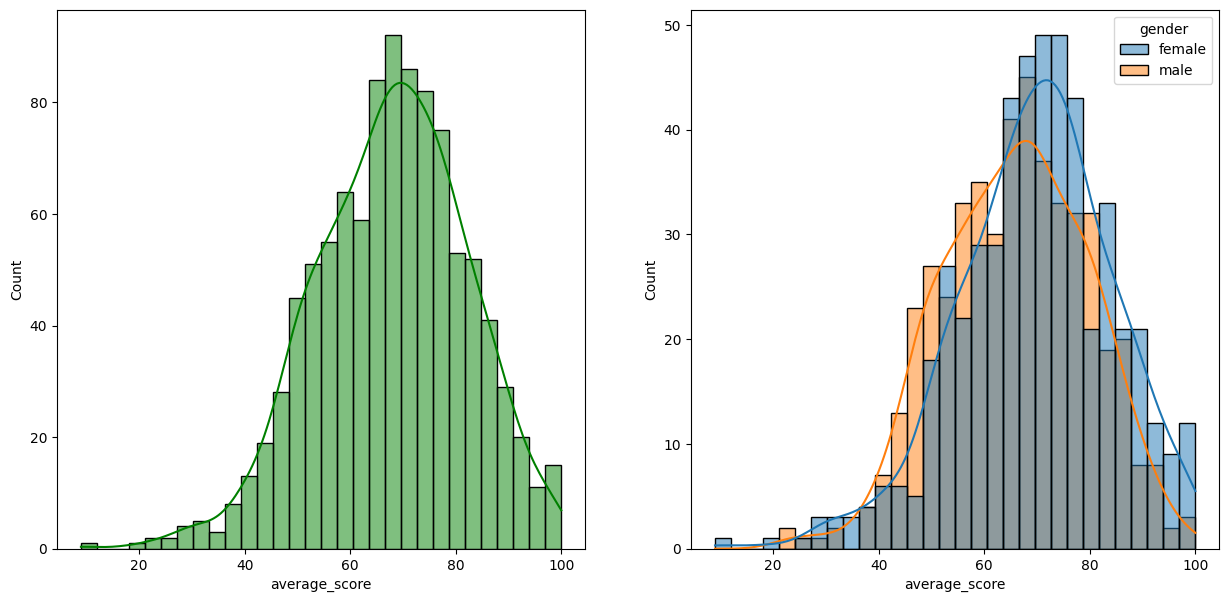

In [41]:
fig,axis = plt.subplots(1, 2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x='average_score', bins = 30, kde = True, color='g')
plt.subplot(122)
sns.histplot(data = df, x= 'average_score', bins = 30, kde = True, hue='gender')
plt.show()

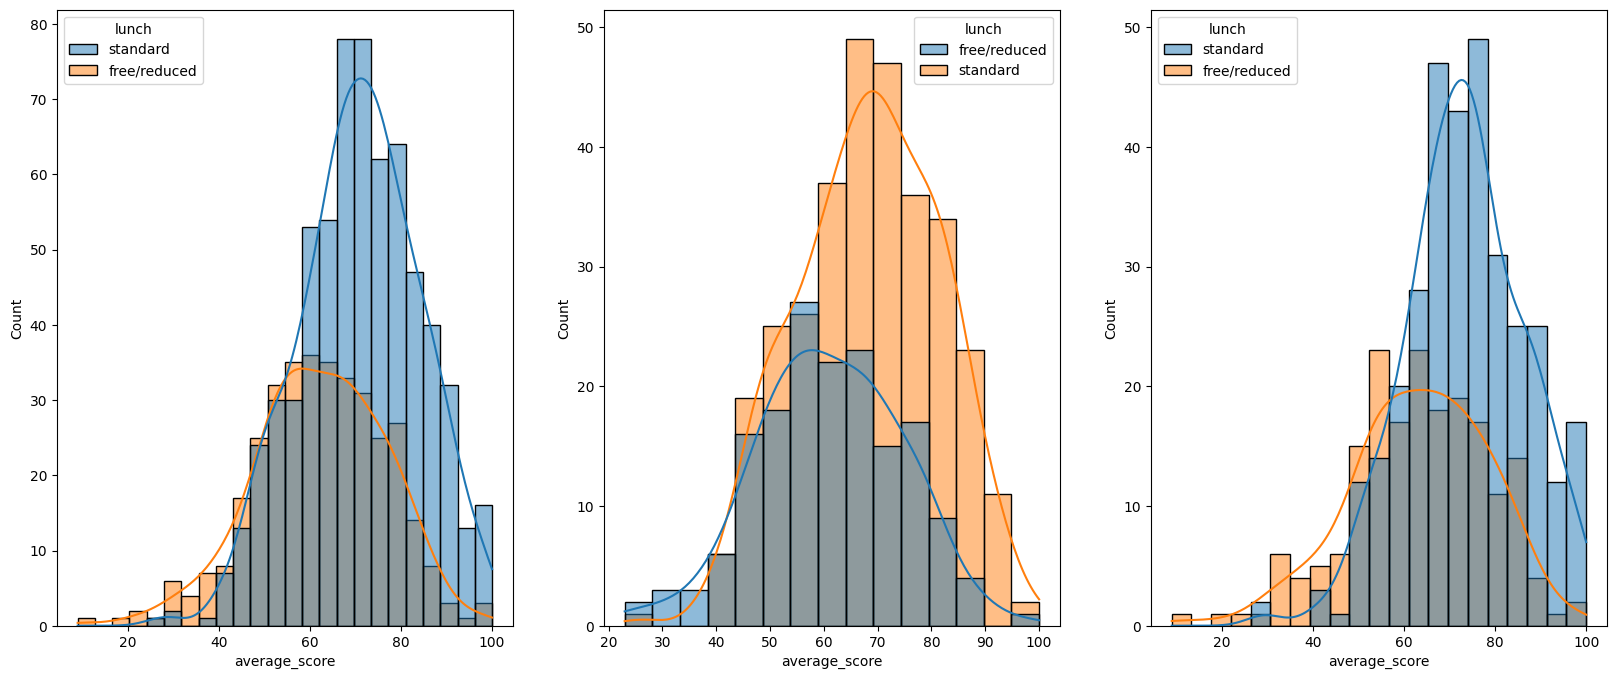

In [58]:
fig,axis=plt.subplots(1,3,figsize = (20,8))
plt.subplot(131)
sns.histplot(data = df, x = 'average_score', kde = True, hue = 'lunch')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'male'], x = 'average_score', kde = True, hue = 'lunch')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'female'], x = 'average_score', kde = True, hue = 'lunch')
plt.show()

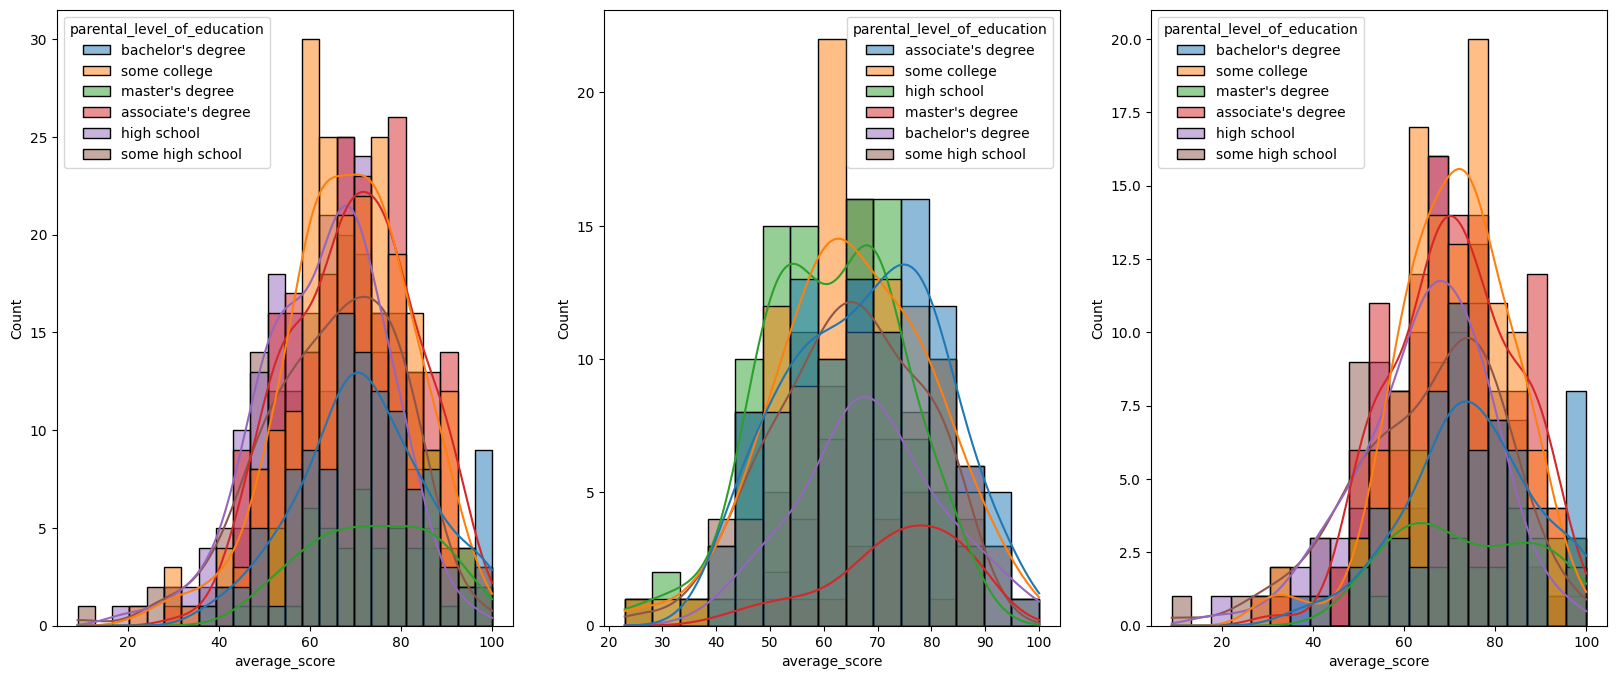

In [61]:
fig,axis=plt.subplots(1,3,figsize = (20,8))
plt.subplot(131)
sns.histplot(data = df, x = 'average_score', kde = True, hue = 'parental_level_of_education')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'male'], x = 'average_score', kde = True, hue = 'parental_level_of_education')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'female'], x = 'average_score', kde = True, hue = 'parental_level_of_education')
plt.show()

/var/folders/lx/cnv3rfws413bvdrf_lmgv88w0000gn/T/ipykernel_71980/621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

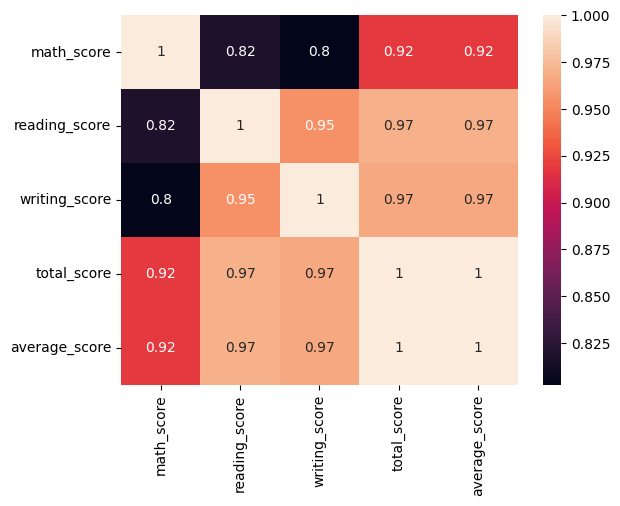

In [62]:
sns.heatmap(df.corr(), annot=True)